<a href="https://colab.research.google.com/github/nyang-cook/Colabatory/blob/main/%EC%84%9C%ED%8F%AC%ED%8A%B8_%EB%B2%A1%ED%84%B0_%EB%A8%B8%EC%8B%A0(Support_Vector_Machines).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 서포트 벡터 머신(Support Vector Machines)

* 회귀, 분류, 이상치 탐지 등에 사용되는 지도학습 방법
* 클래스 사이의 경계에 위치한 데이터 포인트를 서포트 벡터(support vector)라고 함
* 각 서포트 벡터가 클래스 사이의 결정 경계를 구분하는데 얼마나 중요한지를 학습
* 각 서포트 벡터 사이의 마진이 가장 큰 방향으로 학습
* 서포트 벡터 까지의 거리와 지지 벡터의 중요도를 기반으로 예측을 수행

![support vector machine](https://upload.wikimedia.org/wikipedia/commons/thumb/2/20/Svm_separating_hyperplanes.png/220px-Svm_separating_hyperplanes.png)

* H3은 두 클래스의 점들을 제대로 분류하고 있지 않음
* H1과 H2는 두 클래스의 점들을 분류하는데, H2가 H1보다 더 큰 마진을 갖고 분류하는 것을 확인할 수 있음

In [ ]:
import multiprocessing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

<ipython-input-89-3ae7464f8c8f>:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


In [ ]:
from sklearn.svm import SVR, SVC
from sklearn.datasets import fetch_openml
from sklearn.datasets import load_diabetes, load_breast_cancer, load_iris, load_wine
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.manifold import TSNE

## SVM을 이용한 회귀 모델과 분류 모델

### SVM을 사용한 회귀 모델 (SVR)

In [ ]:
boston = fetch_openml(name='boston', version=1, as_frame=True)

In [ ]:
X, y = boston.data, boston.target
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123)

model = SVR()
model.fit(X_train, y_train)
print("학습 데이터 점수: {}".format(model.score(X_train, y_train)))
print("평가 데이터 점수: {}".format(model.score(X_test, y_test)))

학습 데이터 점수: 0.2177283706374875
평가 데이터 점수: 0.13544178468518187


### SVM을 사용한 분류 모델 (SVC)

In [ ]:
X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123)

model = SVC()
model.fit(X_train, y_train)
print("학습 데이터 점수: {}".format(model.score(X_train, y_train)))
print("평가 데이터 점수: {}".format(model.score(X_test, y_test)))

학습 데이터 점수: 0.9014084507042254
평가 데이터 점수: 0.9230769230769231


## 커널 기법

* 입력 데이터를 고차원 공간에 사상해서 비선형 특징을 학습할 수 있도록 확장하는 방법
* scikit-learn에서는 Linear, Polynomial, RBF(Radial Basis Function)등 다양한 커널 기법을 지원

![kernel trick](https://scikit-learn.org/stable/_images/sphx_glr_plot_iris_svc_0011.png)

In [ ]:
X, y = boston.data, boston.target
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123)

linear_svr = SVR(kernel='linear')
linear_svr.fit(X_train, y_train)
print("linear_svr데이터 점수: {}".format(linear_svr.score(X_train, y_train)))
print("linear_svr 데이터 점수: {}".format(linear_svr.score(X_test, y_test)))

polynomial_svr = SVR(kernel='poly')
polynomial_svr.fit(X_train, y_train)
print("polynomial_svr 데이터 점수: {}".format(polynomial_svr.score(X_train, y_train)))
print("polynomial_svr 데이터 점수: {}".format(polynomial_svr.score(X_test, y_test)))

rbf_svr = SVR(kernel='rbf')
rbf_svr.fit(X_train, y_train)
print("rbf_svr 데이터 점수: {}".format(rbf_svr.score(X_train, y_train)))
print("rbf_svr 데이터 점수: {}".format(rbf_svr.score(X_test, y_test)))

linear_svr데이터 점수: 0.715506620496448
linear_svr 데이터 점수: 0.6380398541506058
polynomial_svr 데이터 점수: 0.2024454261446289
polynomial_svr 데이터 점수: 0.133668450367462
rbf_svr 데이터 점수: 0.2177283706374875
rbf_svr 데이터 점수: 0.13544178468518187


In [ ]:
X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123)

linear_svc = SVC(kernel='linear')
linear_svc.fit(X_train, y_train)
print("linear_svc데이터 점수: {}".format(linear_svc.score(X_train, y_train)))
print("linear_svc 데이터 점수: {}".format(linear_svc.score(X_test, y_test)))

polynomial_svc = SVC(kernel='poly')
polynomial_svc.fit(X_train, y_train)
print("polynomial_svc 데이터 점수: {}".format(polynomial_svc.score(X_train, y_train)))
print("polynomial_svc 데이터 점수: {}".format(polynomial_svc.score(X_test, y_test)))

rbf_svc = SVC(kernel='rbf')
rbf_svc.fit(X_train, y_train)
print("rbf_svc 데이터 점수: {}".format(rbf_svc.score(X_train, y_train)))
print("rbf_svc 데이터 점수: {}".format(rbf_svc.score(X_test, y_test)))

linear_svc데이터 점수: 0.960093896713615
linear_svc 데이터 점수: 0.986013986013986
polynomial_svc 데이터 점수: 0.9014084507042254
polynomial_svc 데이터 점수: 0.9230769230769231
rbf_svc 데이터 점수: 0.9014084507042254
rbf_svc 데이터 점수: 0.9230769230769231


## 매개변수 튜닝

* SVM은 사용하는 커널에 따라 다양한 매개변수 설정 가능
* 매개변수를 변경하면서 성능변화를 관찰

In [ ]:
X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123)

In [ ]:
polynomial_svc = SVC(kernel='poly', degree=2, C=0.1, gamma='auto')
polynomial_svc.fit(X_train, y_train)

print("kernel= poly, degree={}, C={}, gamma={}".format(2,0.1, 'auto'))
print("polynomial_svc 데이터 점수: {}".format(polynomial_svc.score(X_train, y_train)))
print("polynomial_svc 데이터 점수: {}".format(polynomial_svc.score(X_test, y_test)))

kernel= poly, degree=2, C=0.1, gamma=auto
polynomial_svc 데이터 점수: 0.9835680751173709
polynomial_svc 데이터 점수: 0.993006993006993


In [ ]:
rbf_svc = SVC(kernel='rbf', C=2.0, gamma='scale')
rbf_svc.fit(X_train, y_train)

print("kernel= poly, C={}, gamma={}".format(2.0, 'scale'))
print("rbf_svc 데이터 점수: {}".format(rbf_svc.score(X_train, y_train)))
print("rbf_svc 데이터 점수: {}".format(rbf_svc.score(X_test, y_test)))

kernel= poly, C=2.0, gamma=scale
rbf_svc 데이터 점수: 0.9154929577464789
rbf_svc 데이터 점수: 0.9370629370629371


## 데이터 전처리

* SVM은 입력 데이터가 정규화 되어야 좋은 성능을 보임
* 주로 모든 특성 값을 [0, 1] 범위로 맞추는 방법을 사용
* scikit-learn의 StandardScaler 또는 MinMaxScaler를 사용해 정규화

In [ ]:
X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123)

In [ ]:
model = SVC()
model.fit(X_train, y_train)

print("SVC 데이터 점수: {}".format(model.score(X_train, y_train)))
print("SVC 데이터 점수: {}".format(model.score(X_test, y_test)))

SVC 데이터 점수: 0.9014084507042254
SVC 데이터 점수: 0.9230769230769231


In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
model = SVC()
model.fit(X_train, y_train)

print("SVC 데이터 점수: {}".format(model.score(X_train, y_train)))
print("SVC 데이터 점수: {}".format(model.score(X_test, y_test)))

SVC 데이터 점수: 0.9835680751173709
SVC 데이터 점수: 0.986013986013986


In [ ]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
model = SVC()
model.fit(X_train, y_train)

print("SVC 데이터 점수: {}".format(model.score(X_train, y_train)))
print("SVC 데이터 점수: {}".format(model.score(X_test, y_test)))

SVC 데이터 점수: 0.9812206572769953
SVC 데이터 점수: 0.986013986013986


## Linear SVR

### 보스턴 주택 가격

In [ ]:
boston = fetch_openml(name='boston', version=1, as_frame=True)

In [ ]:
X, y = boston.data, boston.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
model = SVR(kernel="linear")
model.fit(X_train, y_train)

SVR(kernel='linear')

In [ ]:
print("학습 데이터 점수: {}".format(model.score(X_train, y_train)))
print("평가 데이터 점수: {}".format(model.score(X_test, y_test)))

학습 데이터 점수: 0.7394814377190101
평가 데이터 점수: 0.5688152963044654


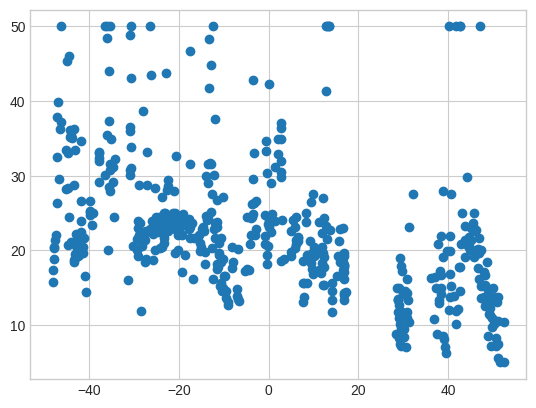

In [ ]:
X_comp = TSNE(n_components=1).fit_transform(X)
plt.scatter(X_comp,y)

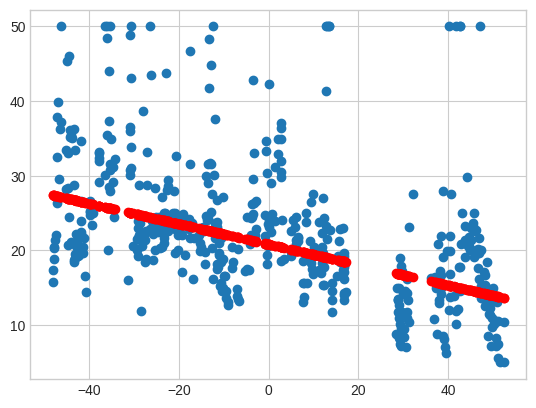

In [ ]:
model.fit(X_comp, y)
predict = model.predict(X_comp)
plt.scatter(X_comp, y)
plt.scatter(X_comp, predict, color="r")

In [ ]:
estimator = make_pipeline(StandardScaler(), SVR(kernel="linear"))

cross_validate(
    estimator = estimator,
    X=X, y=y,
    cv=5,
    n_jobs = multiprocessing.cpu_count(),
    verbose=True
)

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:    2.0s finished


{'fit_time': array([0.04825544, 0.04378819, 0.03836465, 0.03881907, 0.02744627]),
 'score_time': array([0.00767994, 0.00687242, 0.00754476, 0.0070734 , 0.00449014]),
 'test_score': array([0.76908568, 0.72180141, 0.56428426, 0.14083339, 0.07810211])}

In [ ]:
pipe = Pipeline([("scaler", StandardScaler()),
                 ('model', SVR(kernel="linear"))])

param_grid = [{"model__gamma":['scale','auto'],
               'model__C':[1.0, 0.1, 0.01],
               'model__epsilon':[1.0,0.1,0.01]}]

gs = GridSearchCV(
    estimator = pipe,
    param_grid = param_grid,
    n_jobs= multiprocessing.cpu_count(),
    cv=5,
    verbose=True
)

gs.fit(X, y)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', SVR(kernel='linear'))]),
             n_jobs=2,
             param_grid=[{'model__C': [1.0, 0.1, 0.01],
                          'model__epsilon': [1.0, 0.1, 0.01],
                          'model__gamma': ['scale', 'auto']}],
             verbose=True)

In [ ]:
gs.best_estimator_

Pipeline(steps=[('scaler', StandardScaler()),
                ('model', SVR(C=0.1, epsilon=1.0, kernel='linear'))])

### 당뇨병

In [ ]:
X, y = load_diabetes(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
model = SVR(kernel="linear")
model.fit(X_train, y_train)

SVR(kernel='linear')

In [ ]:
print("학습 데이터 점수: {}".format(model.score(X_train, y_train)))
print("평가 데이터 점수: {}".format(model.score(X_test, y_test)))

학습 데이터 점수: 0.5191573817379591
평가 데이터 점수: 0.46321084529039713


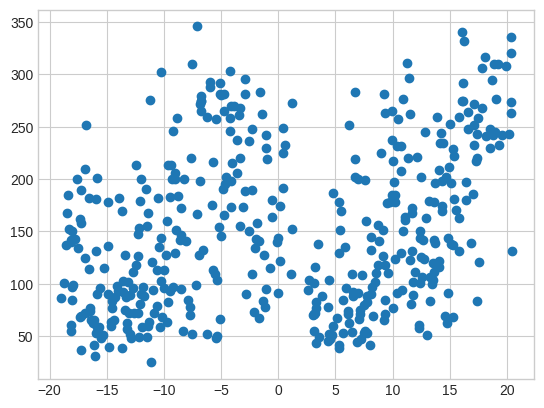

In [ ]:
X_comp = TSNE(n_components=1).fit_transform(X)
plt.scatter(X_comp,y)

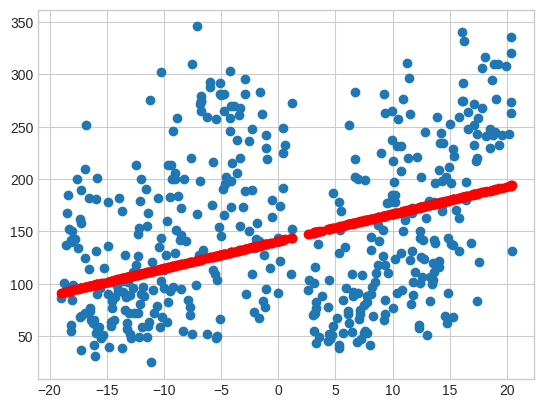

In [ ]:
model.fit(X_comp, y)
predict = model.predict(X_comp)
plt.scatter(X_comp, y)
plt.scatter(X_comp, predict, color="r")

In [ ]:
estimator = make_pipeline(StandardScaler(), SVR(kernel="linear"))

cross_validate(
    estimator = estimator,
    X=X, y=y,
    cv=5,
    n_jobs = multiprocessing.cpu_count(),
    verbose=True
)

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:    2.2s finished


{'fit_time': array([0.02185416, 0.01763487, 0.01389432, 0.0146327 , 0.01432538]),
 'score_time': array([0.00327134, 0.0035429 , 0.00339103, 0.00348043, 0.00229287]),
 'test_score': array([0.43039087, 0.51655019, 0.48275821, 0.4224617 , 0.53077081])}

In [ ]:
pipe = Pipeline([("scaler", StandardScaler()),
                 ('model', SVR(kernel="linear"))])

param_grid = [{"model__gamma":['scale','auto'],
               'model__C':[1.0, 0.1, 0.01],
               'model__epsilon':[1.0,0.1,0.01]}]

gs = GridSearchCV(
    estimator = pipe,
    param_grid = param_grid,
    n_jobs= multiprocessing.cpu_count(),
    cv=5,
    verbose=True
)

gs.fit(X, y)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', SVR(kernel='linear'))]),
             n_jobs=2,
             param_grid=[{'model__C': [1.0, 0.1, 0.01],
                          'model__epsilon': [1.0, 0.1, 0.01],
                          'model__gamma': ['scale', 'auto']}],
             verbose=True)

In [ ]:
gs.best_estimator_

Pipeline(steps=[('scaler', StandardScaler()),
                ('model', SVR(epsilon=1.0, kernel='linear'))])

## Kernel SVR

### 보스턴 주택 가격

In [ ]:
boston = fetch_openml(name='boston', version=1, as_frame=True)

In [ ]:
X, y = boston.data, boston.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
model = SVR(kernel="rbf")
model.fit(X_train, y_train)

SVR()

In [ ]:
print("학습 데이터 점수: {}".format(model.score(X_train, y_train)))
print("평가 데이터 점수: {}".format(model.score(X_test, y_test)))

학습 데이터 점수: 0.6735116537614205
평가 데이터 점수: 0.5739226841959031


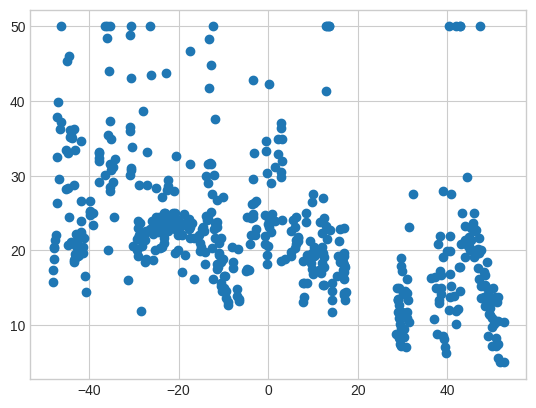

In [ ]:
X_comp = TSNE(n_components=1).fit_transform(X)
plt.scatter(X_comp,y)

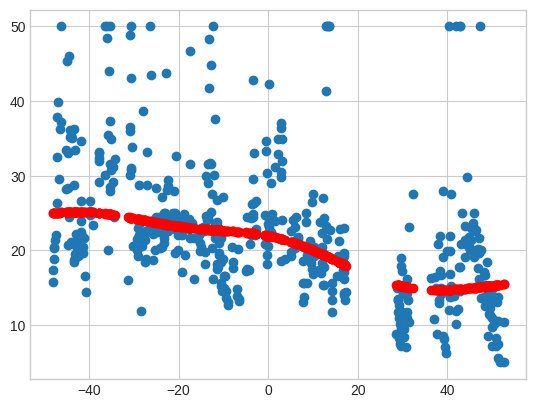

In [ ]:
model.fit(X_comp, y)
predict = model.predict(X_comp)
plt.scatter(X_comp, y)
plt.scatter(X_comp, predict, color="r")

In [ ]:
estimator = make_pipeline(StandardScaler(), SVR(kernel="rbf"))

cross_validate(
    estimator = estimator,
    X=X, y=y,
    cv=5,
    n_jobs = multiprocessing.cpu_count(),
    verbose=True
)

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:    2.3s finished


{'fit_time': array([0.03589368, 0.05187368, 0.02946615, 0.02900815, 0.01701689]),
 'score_time': array([0.01472759, 0.01396322, 0.00949693, 0.00962806, 0.00567102]),
 'test_score': array([ 0.75781445,  0.50211018,  0.04310107,  0.33851703, -0.75997942])}

In [ ]:
pipe = Pipeline([("scaler", StandardScaler()),
                 ('model', SVR(kernel="rbf"))])

param_grid = [{"model__kernel":['rbf','polynomial', 'sigmoid']}]

gs = GridSearchCV(
    estimator = pipe,
    param_grid = param_grid,
    n_jobs= multiprocessing.cpu_count(),
    cv=5,
    verbose=True
)

gs.fit(X, y)

Fitting 5 folds for each of 3 candidates, totalling 15 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
5 fits failed out of a total of 15.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py", line 473, in fit
    self._final_estimator.fit(Xt, y, **last_step_params["fit"])
  File "/usr/local/lib/python

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', SVR())]),
             n_jobs=2,
             param_grid=[{'model__kernel': ['rbf', 'polynomial', 'sigmoid']}],
             verbose=True)

In [ ]:
best_model = gs.best_estimator_.named_steps['model']
print("C:", best_model.C)
print("degree:", best_model.degree)
print("epsilon:", best_model.epsilon)
print("gamma:", best_model.gamma)

C: 1.0
degree: 3
epsilon: 0.1
gamma: scale


### 당뇨병

In [ ]:
X, y = load_diabetes(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
model = SVR(kernel="rbf")
model.fit(X_train, y_train)

SVR()

In [ ]:
print("학습 데이터 점수: {}".format(model.score(X_train, y_train)))
print("평가 데이터 점수: {}".format(model.score(X_test, y_test)))

학습 데이터 점수: 0.18572982630938206
평가 데이터 점수: 0.16240165567961073


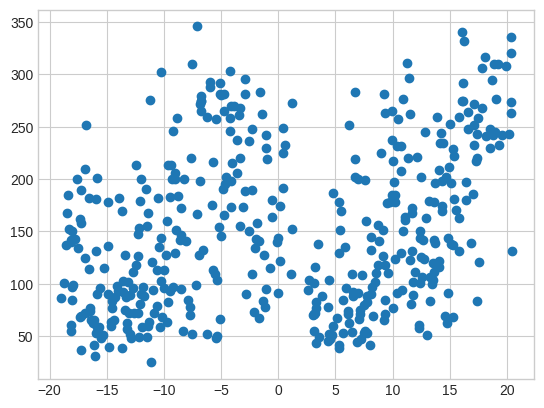

In [ ]:
X_comp = TSNE(n_components=1).fit_transform(X)
plt.scatter(X_comp,y)

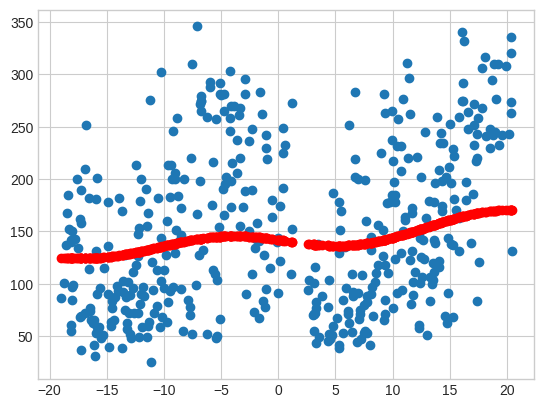

In [ ]:
model.fit(X_comp, y)
predict = model.predict(X_comp)
plt.scatter(X_comp, y)
plt.scatter(X_comp, predict, color="r")

In [ ]:
estimator = make_pipeline(StandardScaler(), SVR(kernel="rbf"))

cross_validate(
    estimator = estimator,
    X=X, y=y,
    cv=5,
    n_jobs = multiprocessing.cpu_count(),
    verbose=True
)

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:    3.0s finished


{'fit_time': array([0.02794743, 0.03900933, 0.03522372, 0.01672959, 0.03312659]),
 'score_time': array([0.00609779, 0.00632763, 0.01445389, 0.01302195, 0.00920916]),
 'test_score': array([0.14580768, 0.12539699, 0.18163843, 0.12222929, 0.15792104])}

In [ ]:
pipe = Pipeline([("scaler", StandardScaler()),
                 ('model', SVR(kernel="rbf"))])

param_grid = [{"model__kernel":['rbf','polynomial', 'sigmoid']}]

gs = GridSearchCV(
    estimator = pipe,
    param_grid = param_grid,
    n_jobs= multiprocessing.cpu_count(),
    cv=5,
    verbose=True
)

gs.fit(X, y)

Fitting 5 folds for each of 3 candidates, totalling 15 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
5 fits failed out of a total of 15.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py", line 473, in fit
    self._final_estimator.fit(Xt, y, **last_step_params["fit"])
  File "/usr/local/lib/python

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', SVR())]),
             n_jobs=2,
             param_grid=[{'model__kernel': ['rbf', 'polynomial', 'sigmoid']}],
             verbose=True)

In [ ]:
best_model = gs.best_estimator_.named_steps['model']
print("C:", best_model.C)
print("degree:", best_model.degree)
print("epsilon:", best_model.epsilon)
print("gamma:", best_model.gamma)
print(gs.best_params_)

C: 1.0
degree: 3
epsilon: 0.1
gamma: scale
{'model__kernel': 'sigmoid'}


## Linear SVC

### 유방암

In [ ]:
X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
model = SVC(kernel="linear")
model.fit(X_train, y_train)

SVC(kernel='linear')

In [ ]:
print("학습 데이터 점수: {}".format(model.score(X_train, y_train)))
print("평가 데이터 점수: {}".format(model.score(X_test, y_test)))

학습 데이터 점수: 0.9912087912087912
평가 데이터 점수: 0.9649122807017544


In [ ]:
def make_meshgrid(x,y, h=.02):
  x_min, x_max = x.min() - 1, x.max() + 1
  y_min, y_max = y.min() - 1, y.max() + 1
  xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                       np.arange(y_min, y_max, h))
  return xx, yy

In [ ]:
def plot_contours(clf, xx, yy, **params):
  Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
  Z = Z.reshape(xx.shape)
  out = plt.contourf(xx, yy, Z, **params)
  return out

In [ ]:
X_comp = TSNE(n_components=2).fit_transform(X)
X0, X1 = X_comp[:,0], X_comp[:,1]
xx, yy = make_meshgrid(X0, X1)



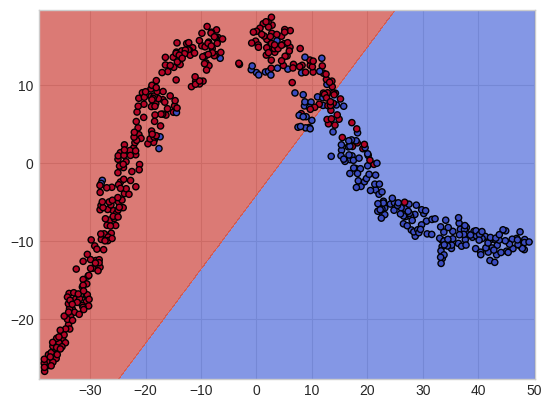

In [ ]:
model.fit(X_comp, y)

plot_contours(model, xx, yy, cmap=plt.cm.coolwarm, alpha=0.7)
plt.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')

In [ ]:
estimator = make_pipeline(StandardScaler(), SVC(kernel="linear"))

cross_validate(
    estimator = estimator,
    X=X, y=y,
    cv=5,
    n_jobs = multiprocessing.cpu_count(),
    verbose=True
)

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:    0.1s finished


{'fit_time': array([0.02074742, 0.01028466, 0.01962757, 0.0302186 , 0.01674104]),
 'score_time': array([0.00776482, 0.0116303 , 0.01310325, 0.00260806, 0.00958681]),
 'test_score': array([0.96491228, 0.98245614, 0.96491228, 0.96491228, 0.98230088])}

In [ ]:
pipe = Pipeline([("scaler", StandardScaler()),
                 ('model', SVC(kernel="rbf"))])

param_grid = [{"model__gamma":['scale','auto'],
               "model__C" : [1.0,0.1,0.01]}]

gs = GridSearchCV(
    estimator = pipe,
    param_grid = param_grid,
    n_jobs= multiprocessing.cpu_count(),
    cv=5,
    verbose=True
)

gs.fit(X, y)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', SVC())]),
             n_jobs=2,
             param_grid=[{'model__C': [1.0, 0.1, 0.01],
                          'model__gamma': ['scale', 'auto']}],
             verbose=True)

In [ ]:
best_model = gs.best_estimator_.named_steps['model']
print("C:", best_model.C)
print("degree:", best_model.degree)
print("epsilon:", best_model.epsilon)
print("gamma:", best_model.gamma)
print(gs.best_params_)

C: 1.0
degree: 3
epsilon: 0.0
gamma: scale
{'model__C': 1.0, 'model__gamma': 'scale'}


### 붓꽃

### 와인

## Kernel SVC

### 유방암

In [ ]:
X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
model = SVC(kernel="rbf")
model.fit(X_train, y_train)

SVC()

In [ ]:
print("학습 데이터 점수: {}".format(model.score(X_train, y_train)))
print("평가 데이터 점수: {}".format(model.score(X_test, y_test)))

학습 데이터 점수: 0.9868131868131869
평가 데이터 점수: 0.9824561403508771


In [ ]:
X_comp = TSNE(n_components=2).fit_transform(X)
X0, X1 = X_comp[:,0], X_comp[:,1]
xx, yy = make_meshgrid(X0, X1)

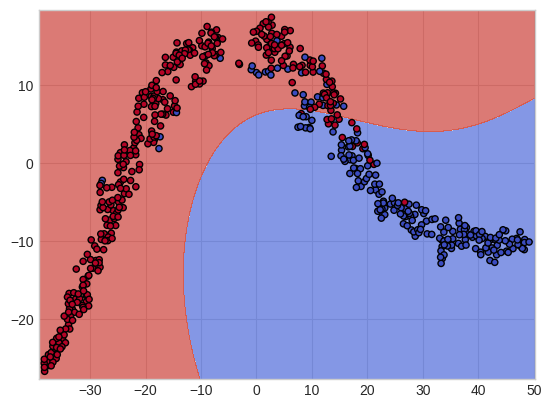

In [ ]:
model.fit(X_comp, y)

plot_contours(model, xx, yy, cmap=plt.cm.coolwarm, alpha=0.7)
plt.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')

In [ ]:
estimator = make_pipeline(StandardScaler(), SVC(kernel="rbf"))

cross_validate(
    estimator = estimator,
    X=X, y=y,
    cv=5,
    n_jobs = multiprocessing.cpu_count(),
    verbose=True
)

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:    2.1s finished


{'fit_time': array([0.01081729, 0.01070666, 0.01017809, 0.00986099, 0.00754905]),
 'score_time': array([0.00382662, 0.00382566, 0.00389862, 0.00366473, 0.00229406]),
 'test_score': array([0.97368421, 0.95614035, 1.        , 0.96491228, 0.97345133])}

In [ ]:
pipe = Pipeline([("scaler", StandardScaler()),
                 ('model', SVC(kernel="rbf"))])

param_grid = [{"model__gamma":['scale','auto'],
               "model__C" : [1.0,0.1,0.01]}]

gs = GridSearchCV(
    estimator = pipe,
    param_grid = param_grid,
    n_jobs= multiprocessing.cpu_count(),
    cv=5,
    verbose=True
)

gs.fit(X, y)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', SVC())]),
             n_jobs=2,
             param_grid=[{'model__C': [1.0, 0.1, 0.01],
                          'model__gamma': ['scale', 'auto']}],
             verbose=True)

In [ ]:
best_model = gs.best_estimator_.named_steps['model']
print("C:", best_model.C)
print("degree:", best_model.degree)
print("epsilon:", best_model.epsilon)
print("gamma:", best_model.gamma)
print(gs.best_params_)

C: 1.0
degree: 3
epsilon: 0.0
gamma: scale
{'model__C': 1.0, 'model__gamma': 'scale'}


### 붓꽃

### 와인